In [ ]:
!pip install deap
import deap
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


     |████████████████████████████████| 160 kB 4.0 MB/s 


# Initialization of the chess board with eight queens using a position-index-based board representation.
### Each 8x8 board is represented by 8 queens with values ranging from 0-64 to indicate its position on the chess board.

In [ ]:
# Create a dataset of 8 queens in random spots on a chess board.
def create_individual():
    # Returning a set of 8 queens with values ranging from 0-64.
    return random.sample(range(64), 8)

In [ ]:
# Creating and displaying a random chess board with 8 queens.
print(create_individual())

[7, 16, 62, 23, 1, 30, 49, 45]


In [ ]:
# Displaying the chess board in a position-index-based representation.
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")

In [ ]:
# Creating a toolbox to hold the generated queens.
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Populating both the toolbox and the chess board to display a possible outcome.
pop = toolbox.population(n=5)

print(pop[0])
show_grid(pop[0])

[56, 43, 25, 11, 5, 14, 6, 40]
-|-|-|-|-|X|X|-|
----------------
-|-|-|X|-|-|X|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
X|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------


In [ ]:
# Printing the generated queens and sorting them for evaluation.
print(len(pop[0]))
print(pop[0])
pop[0].sort()
print(pop[0])

8
[56, 43, 25, 11, 5, 14, 6, 40]
[5, 6, 11, 14, 25, 40, 43, 56]


## Evaluating the Fitness of a Board
### This function determines if the queens on a position-index-based board representation are valid as a solution to the n-queens problem by linearly analyzing positions of queens. Duplicate queen positions are subsequentially handled.

In [ ]:
# Calculating the fitness of a board by checking for any conflicting queens that may attack each other.
def evaFitness(individual):

    size  = len(individual)
    conflicts = 0
    for m in range(size):
        ## This checks for all possible left diagnal conflicts.
        for i in range(size):
            ## If the edge of the board is reached, it will break here.
            if((individual[m]+(i*(size-1)))%size) == 0:
                break
            ## Checking if theres anything in the list that conflicts with i*7, 
            ## moving down in the left diagnal direction.
            for n in range(size):
                if individual[m]+(i*(size-1)) == individual[n] and individual[m] != individual[n]:
                    conflicts += 1
        ## This checks for all possible right diagnal conflicts.
        for t in range(size):
            ## If the edge of the board is reached, it will break here.
            if ((individual[m]+(t*(size+1)))%size) == (size-1):
                break
           ## Checking if theres anything in the list that conflicts with i*9, 
           ## moving down in the right diagnal direction.
            for f in range(size):
                if individual[m]+(t*(size+1)) == individual[f] and individual[m] != individual[f]:
                    conflicts += 1
            
    for w in range(0,size):
        #this checks for vertical by determining the vertical position with modulus
        vertical = individual[w]%size
        #this checks for horizontal by determining the horizontal position with divison
        horizontal = (individual[w]-vertical)/size
        #this checks for horizontal and vertical by comparing the above values 
        #to the rest of the values in the individual
        for j in range(w+1, size):
            vertical_check = individual[j]%size
            horizontal_check = (individual[j] - vertical_check)/size
            if vertical == vertical_check:
                conflicts +=1
            if horizontal == horizontal_check:
                conflicts +=1
                
    return (checkDuplicate(individual)+conflicts,)
    
# Determines if there are any queens in duplicate positions that would
# result in an invalid board.
def checkDuplicate(individual):
    dup = 0
    size = len(individual)
    # Taking a particular position to compare with every other possible 
    # queen position generated on the current board.
    for i in range(size):
        for m in range(size):
            if individual[i] == individual[m] and i != m:
                dup += 1
    
    return dup
    
    

### Registering the new evaluation function and other important functions to the toolbox.

In [ ]:
# Registering the functions, evaluate, mate, mutate, and select to the toolbox.
toolbox.register("evaluate", evaFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Additionally, registering a statistics toolbox, with the functions, avg and min.
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

## Creating the first generation, the hall of fame, and running the eaSimple genetic algorithm for 100 generations. 

In [ ]:
# Creating a the hall of fame, and running the algorithm for 100 generations.
hof = tools.HallOfFame(1)
pop = toolbox.population(n=20)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.5 ,ngen=200, halloffame=hof, stats = stats, verbose = True)


gen	nevals	avg	min
0  	20    	8.2	4  
1  	11    	7.55	4  
2  	17    	7.2 	4  
3  	14    	5.7 	2  
4  	14    	5.75	2  
5  	14    	4.75	2  
6  	17    	4.55	2  
7  	13    	4.75	2  
8  	11    	3.8 	2  
9  	17    	4.5 	2  
10 	14    	4.35	2  
11 	12    	3.5 	2  
12 	13    	3.95	2  
13 	17    	3.3 	2  
14 	17    	4   	2  
15 	10    	3.65	2  
16 	16    	3.75	2  
17 	16    	4.1 	2  
18 	15    	4.45	2  
19 	9     	3.4 	2  
20 	12    	3.9 	2  
21 	14    	4.35	2  
22 	14    	3.15	2  
23 	14    	3.7 	2  
24 	17    	3.3 	2  
25 	16    	3.45	2  
26 	18    	3.6 	2  
27 	15    	4.35	2  
28 	16    	3.8 	2  
29 	16    	4.3 	2  
30 	13    	3.8 	2  
31 	16    	3.85	2  
32 	14    	4.25	2  
33 	13    	3.4 	2  
34 	11    	2.95	2  
35 	17    	4.1 	2  
36 	10    	3.3 	2  
37 	18    	2.9 	2  
38 	16    	3.4 	2  
39 	13    	4.85	2  
40 	16    	4.05	2  
41 	10    	3.35	2  
42 	17    	5.05	2  
43 	14    	3.85	2  
44 	17    	3.25	2  
45 	12    	3.75	2  
46 	18    	3.6 	2  
47 	16    	3.25	2  
48 	17    	4.1 	2  
49

### Plotting the average and minimum of each generation using a simple line graph.

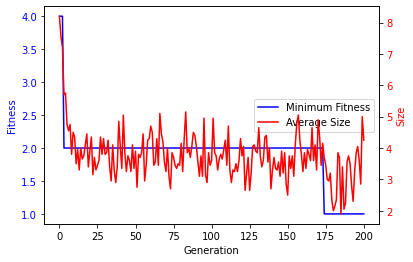

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

gen = logbook.select("gen")
fit_mins = logbook.select("min")
size_avgs = logbook.select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()





### Showcasing the best individual chess board and its fitness value. 

In [ ]:
print("Best individual board: ", hof[0])
show_grid(hof[0])


Best individual board:  [27, 61, 42, 1, 62, 48, 23, 12]
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|X|-|
----------------


# Initialization of the chess board with eight queens using a row-index-based board representation.
### This representation puts each queen's value at an integer from 0-7, indicating its position in the particular row.

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
# Creating and registering functions to the toolbox.
toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)
toolbox.individual()

[3, 0, 6, 3, 4, 0, 1, 7]

In [ ]:
# Function used to display the row-index-based board representation.
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
# Registering and displaying a generation of queens.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
pop = toolbox.population(n=5)

print(pop[0])
show_grid(pop[0])

[0, 3, 6, 5, 3, 4, 2, 1]
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------


## Evaluating the Fitness of a Board
### This function determines if the queens on a row-index-based board representation are valid as a solution to the n-queens problem by anaylzing spacing of the positions of queens. Duplicate queen positions are subsequentially handled.


In [ ]:
#fitness function
def evaFitness(individual):
    size = len(individual)
    conflicts = 0
    for i in range(size):
        for m in range(i+1, size):
            if individual[i] == individual[m] and i != m:
                conflicts += 1
                
    ##check for diagnals
    for t in range(size):
        for n in range(t+1, size):
            #determine right diagnal by checking the spacing between the two points 
            if(individual[n] == (individual[t]+(n-t))):
                conflicts += 1
            #determine left diagnal by checking the spacing between the two points 
            elif(individual[n] == (individual[t]-(n-t))):
                conflicts += 1
    return (conflicts,)
 

In [ ]:
# Registering functions, evaluate, mate, mutate and select to the toolbox.
toolbox.register("evaluate", evaFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
# Additionally, registering a statistics toolbox, with the functions, avg and min.
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

##Creating the first generation, the hall of fame, and running the eaSimple genetic algorithm for 100 generations.

In [ ]:
# Creating a the hall of fame, and running the algorithm for 100 generations.
hof = tools.HallOfFame(1)
pop = toolbox.population(n=20)
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.5 ,ngen=200, halloffame=hof, stats = stats, verbose = True)

gen	nevals	avg	min
0  	20    	8.4	4  
1  	16    	6.75	3  
2  	18    	5.7 	3  
3  	14    	5   	4  
4  	15    	4.8 	2  
5  	14    	4.1 	2  
6  	14    	3.6 	2  
7  	13    	3.3 	2  
8  	12    	3.8 	2  
9  	15    	3.15	2  
10 	16    	3.45	2  
11 	16    	3.55	2  
12 	15    	3.6 	2  
13 	13    	3.15	2  
14 	16    	3.05	2  
15 	17    	3.55	2  
16 	16    	3.35	2  
17 	15    	2.9 	2  
18 	15    	3.55	2  
19 	16    	3.35	2  
20 	15    	3.45	2  
21 	15    	3.35	2  
22 	17    	3.25	2  
23 	14    	4.05	2  
24 	17    	3.35	2  
25 	13    	2.75	2  
26 	16    	3.35	2  
27 	14    	3.1 	2  
28 	17    	3.15	2  
29 	14    	3.25	2  
30 	15    	3.7 	2  
31 	15    	4.6 	2  
32 	11    	3.45	2  
33 	16    	3   	2  
34 	15    	3.3 	2  
35 	17    	2.9 	2  
36 	15    	3.05	2  
37 	14    	3.5 	2  
38 	14    	4   	1  
39 	15    	3.35	1  
40 	15    	3.15	1  
41 	14    	2.5 	1  
42 	12    	2.3 	1  
43 	16    	2.7 	1  
44 	15    	2.6 	1  
45 	13    	2.9 	1  
46 	11    	2.75	1  
47 	13    	2.25	1  
48 	17    	2.7 	1  
49

## Plotting the average and minimum of each generation using a simple line graph.

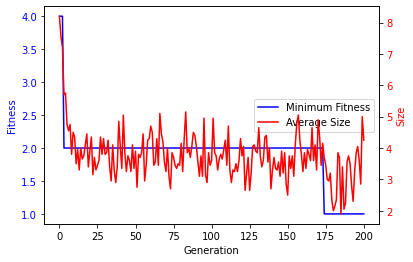

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

gen = logbook.select("gen")
fit_mins = logbook.select("min")
size_avgs = logbook.select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

### Showcasing the best individual chess board and its fitness value. 


In [ ]:
print("Best individual board: ", hof[0])
show_grid(hof[0])


Best individual board:  [4, 1, 7, 6, 3, 0, 2, 5]
-|-|-|-|X|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|X|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------


## Analyzation and comparison of the two different representations. 

Between the two different graphs, the row-index-based board representation(RIB) seems to be a better representation. In comparison, RIB seems to have to have a lower fitness overall compared to the position-based(PB) board representation, while also decreasing at a much faster rate. However, the average size for PB is lower by .5 as the generations go on. Based on these observations, I believe that the RIB board representation is the better choice as it is able to lower the fitness a lot sooner and generate a lower fitness score more consistently. When changing the parameters and increasing the number of generations, the RIB consistently calculates lower fitness scores. By changing the chance of mutation by .1, the fitness seems to go a bit lower, however, by going any further, it creates varying values of fitness. 